# Initial Sentiment Determination

In [1]:
import pandas as pd
from transformers import pipeline

# Import the dataset
data = pd.read_csv("../data/outputs/reddit_data_VAR_100p_15c_13sr_preprocessed.csv")

# Create a pipeline object for the classification model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

# Determine sentiment of comments and posts in the dataset
def determine_sentiment(text):
    """Determine the sentiment of a text extract using tabularisai/multilingual-sentiment-analysis."""
    try:
        sent = pipe(str(text))
        return sent
    except RuntimeError:
        return [{"label": "NA", "score": 0}]

for col in ["title_preprocessed", "comment_content_preprocessed"]:
    sent_res_col_nm = f"{col.replace('_preprocessed', '')}_sentiment_results"
    data[sent_res_col_nm] = data[col].apply(lambda x: determine_sentiment(str(x)))
    data[f"{col.replace('_preprocessed', '')}_sentiment_label"] = data[sent_res_col_nm].apply(lambda x: x[0]["label"])
    data[f"{col.replace('_preprocessed', '')}_sentiment_confidence"] = data[sent_res_col_nm].apply(lambda x: x[0]["score"])

data.head(5)

c:\Users\charl\PycharmProjects\Reddit Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (556 > 512). Running this sequence through the model will result in indexing errors


,Unnamed: 0,post_id,comment_id,title,title_preprocessed,comment_content,comment_content_preprocessed,post_detected_lang,comment_detected_lang,post_year,subreddit,title_sentiment_results,title_sentiment_label,title_sentiment_confidence,comment_content_sentiment_results,comment_content_sentiment_label,comment_content_sentiment_confidence
0,1,1fnhpxd,loim242,Erling Haaland will face NO retrospective puni...,Erling Haaland face retrospective punishment t...,Every game when someone scores at city can the...,game scores city find haaland throw ball head?,en,en,2024,PremierLeague,"[{'label': 'Neutral', 'score': 0.4278266131877...",Neutral,0.427827,"[{'label': 'Neutral', 'score': 0.3292558491230...",Neutral,0.329256
1,2,1fnhpxd,loictrf,Erling Haaland will face NO retrospective puni...,Erling Haaland face retrospective punishment t...,So it's open season to do this every game now?...,open season game ? Sweet going major shithousery,en,en,2024,PremierLeague,"[{'label': 'Neutral', 'score': 0.4278266131877...",Neutral,0.427827,"[{'label': 'Very Positive', 'score': 0.5499159...",Very Positive,0.549916
2,3,1fnhpxd,loj3sg6,Erling Haaland will face NO retrospective puni...,Erling Haaland face retrospective punishment t...,Haaland left them with no choice but to choose...,Haaland left choice choose action,en,en,2024,PremierLeague,"[{'label': 'Neutral', 'score': 0.4278266131877...",Neutral,0.427827,"[{'label': 'Neutral', 'score': 0.4198570549488...",Neutral,0.419857
3,4,1fnhpxd,loib3fa,Erling Haaland will face NO retrospective puni...,Erling Haaland face retrospective punishment t...,Kicking the ball away - Yellow card\n\nThrowin...,Kicking ball away - Yellow card Throwing ball ...,en,en,2024,PremierLeague,"[{'label': 'Neutral', 'score': 0.4278266131877...",Neutral,0.427827,"[{'label': 'Very Positive', 'score': 0.2648611...",Very Positive,0.264861
4,5,1fnhpxd,lom130h,Erling Haaland will face NO retrospective puni...,Erling Haaland face retrospective punishment t...,This will be the same outcome as the 115 charg...,outcome 115 charges currently investigated 😂,en,en,2024,PremierLeague,"[{'label': 'Neutral', 'score': 0.4278266131877...",Neutral,0.427827,"[{'label': 'Neutral', 'score': 0.4969497919082...",Neutral,0.496950


# Data Exploration

IQR: 0.3228009194135666-0.4179880917072296


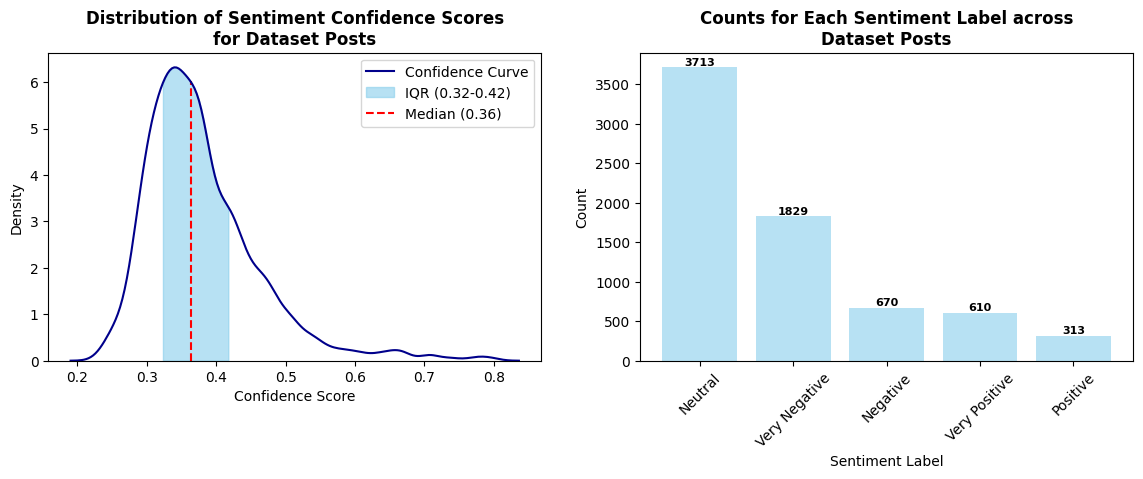

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


def plot_conf_and_labels(df, score_col_nm, label_col_nm, title_nm):
    """Plot the confidence score as a distribution and confidence label counts as a bar plot."""
    # create figure
    fig = plt.figure(figsize=(14, 4))
    ax1, ax2 = fig.subplots(ncols=2)

    sent_label_counts = data[label_col_nm].value_counts()
    ax2.bar(sent_label_counts.index, sent_label_counts.values, alpha=0.6, color='skyblue', label="Label Frequency")
    for bar in ax2.containers:
        ax2.bar_label(bar, fmt='%d', label_type='edge', padding=0.1, fontsize=8, fontweight="bold", color='black')
    ax2.tick_params(axis="x", rotation=45)
    ax2.set_title(f"Counts for Each Sentiment Label across\nDataset {title_nm}", fontweight="bold")
    ax2.set_ylabel("Count")
    ax2.set_xlabel("Sentiment Label")

    # Plot confidence curve
    confidence_scores = data[score_col_nm]

    # Calculate IQR & Median
    median_value = np.median(confidence_scores)
    q1 = np.percentile(confidence_scores, 25)
    q3 = np.percentile(confidence_scores, 75)
    print(f"IQR: {q1}-{q3}")

    # plot curve
    kde_plot = sns.kdeplot(confidence_scores, ax=ax1, color='darkblue', label="Confidence Curve", zorder=2)
    x_vals = kde_plot.get_lines()[0].get_xdata()
    y_vals = kde_plot.get_lines()[0].get_ydata()

    # find y axis values to stop lines
    median_y = y_vals[np.argmin(np.abs(x_vals - median_value))]

    # Plot IQR and Median
    ax1.fill_between(x_vals, 0, y_vals, where=(x_vals >= q1) & (x_vals <= q3), color="skyblue", alpha=0.6, label=f"IQR ({round(q1, 2)}-{round(q3, 2)})", zorder=0)
    ax1.plot([median_value, median_value], [0, median_y], color="red", linestyle="dashed", label=f"Median ({round(median_value, 2)})", zorder=1)
    ax1.set_xlabel("Confidence Score")
    ax1.set_ylabel("Density")
    ax1.set_title(f"Distribution of Sentiment Confidence Scores\nfor Dataset {title_nm}", fontweight="bold")
    ax1.legend()
    return fig

posts_df = data.copy()[["title", "title_sentiment_label", "title_sentiment_confidence"]].drop_duplicates()
plot_conf_and_labels(posts_df, "title_sentiment_confidence", "title_sentiment_label", "Posts");

IQR: 0.3340480625629425-0.45521998405456543


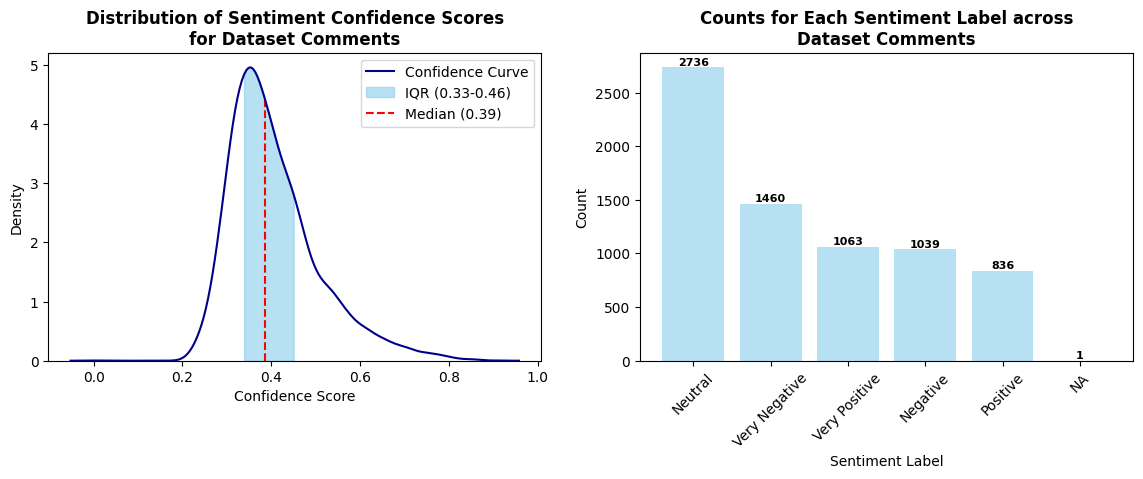

In [3]:
plot_conf_and_labels(data["comment_content_sentiment_label"].value_counts(), "comment_content_sentiment_confidence", "comment_content_sentiment_label", "Comments");

# Final Score Calculation

In [4]:
# Drop NA
data = data[data["comment_content_sentiment_label"]!="NA"]

# Define mapping for sentiment labels
sentiment_map = {
    "Very Negative": -2,
    "Negative": -1,
    "Neutral": 0,
    "Positive": 1,
    "Very Positive": 2
}

# Weighting
# ALL: comment-0.7, post-0.3
def get_comment_sentiment(row):
    """
    Determine the sentiment of a comment using the post title as context.
    
    For this calculation, the comment hold 70% of the weight while the post title
    holds 30%.
    """
    # Create weights
    POST_WEIGHT = 0.3
    COMMENT_WEIGHT = 0.7
    post_label_int = sentiment_map[row["title_sentiment_label"]]
    comment_label_int = sentiment_map[row["comment_content_sentiment_label"]]
    # Determine final sentiment label score
    weighted_comment_int = (
        (POST_WEIGHT*post_label_int)+(COMMENT_WEIGHT*comment_label_int)
    )
    reverse_sent_map = {v: k for k, v in sentiment_map.items()}
    return(reverse_sent_map[int(round(weighted_comment_int, 0))])

# filter out 25th percentile
data = data[data["comment_content_sentiment_confidence"]>=0.334]
data["weighted_comment_sentiment"] = data.apply(lambda x: get_comment_sentiment(x), axis=1)
data.to_csv("../data/outputs/reddit_data_VAR_100p_15c_13sr_with_sentiment.csv")


In [5]:
# order sentiments
sentiment_order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]
data["weighted_comment_sentiment"] = pd.Categorical(
    data["weighted_comment_sentiment"], 
    categories=sentiment_order, 
    ordered=True
)
data_sorted = data.sort_values(by="weighted_comment_sentiment")

# Results Visualisation

In [6]:
# col map
sentiment_colors = {
    "Very Negative": "#D32F2F",  # Dark red
    "Negative": "#FF9999",       # Light red
    "Neutral": "#D3D3D3",        # Grey
    "Positive": "#99FF99",       # Light green
    "Very Positive": "#388E3C"   # Dark green
}
sentiment_counts = data.groupby(["subreddit", "post_year", "weighted_comment_sentiment"]).size().unstack(fill_value=0)
sentiment_counts.to_csv("../data/outputs/reddit_data_VAR_100p_15c_13sr_aggregated_counts.csv")
sentiment_counts = sentiment_counts.reindex(columns=sentiment_order).reset_index()
value_counts = sentiment_counts.drop(columns=["subreddit", "post_year"]).sum()
subr_value_counts = sentiment_counts.drop("post_year", axis=1).groupby("subreddit").sum().reset_index().set_index("subreddit")
year_value_counts = sentiment_counts.drop("subreddit", axis=1).groupby("post_year").sum().reset_index().set_index("post_year")

C:\Users\charl\AppData\Local\Temp\ipykernel_9600\2445212396.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts = data.groupby(["subreddit", "post_year", "weighted_comment_sentiment"]).size().unstack(fill_value=0)


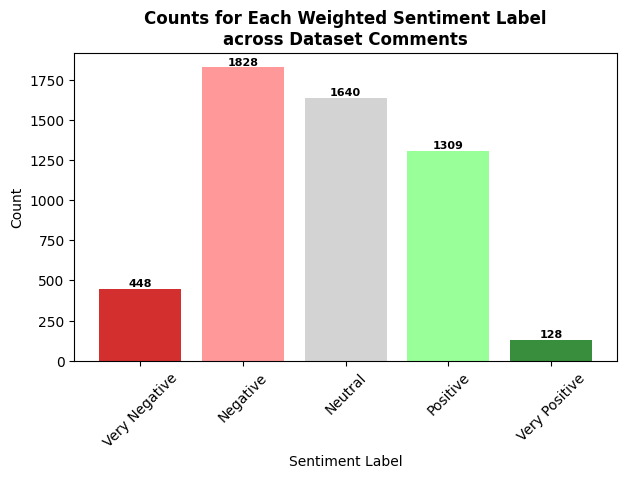

In [7]:
# Plot sentiment label counts
fig = plt.figure(figsize=(7, 4))
ax1 = fig.subplots()

bar_colors = [sentiment_colors[label] for label in value_counts.index]
ax1.bar(value_counts.index, value_counts.values, alpha=1, color=bar_colors, label="Label Frequency")
for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%d', label_type='edge', padding=0.1, fontsize=8, fontweight="bold", color='black')
ax1.tick_params(axis="x", rotation=45)
ax1.set_title(f"Counts for Each Weighted Sentiment Label\nacross Dataset Comments", fontweight="bold")
ax1.set_ylabel("Count")
ax1.set_xlabel("Sentiment Label");

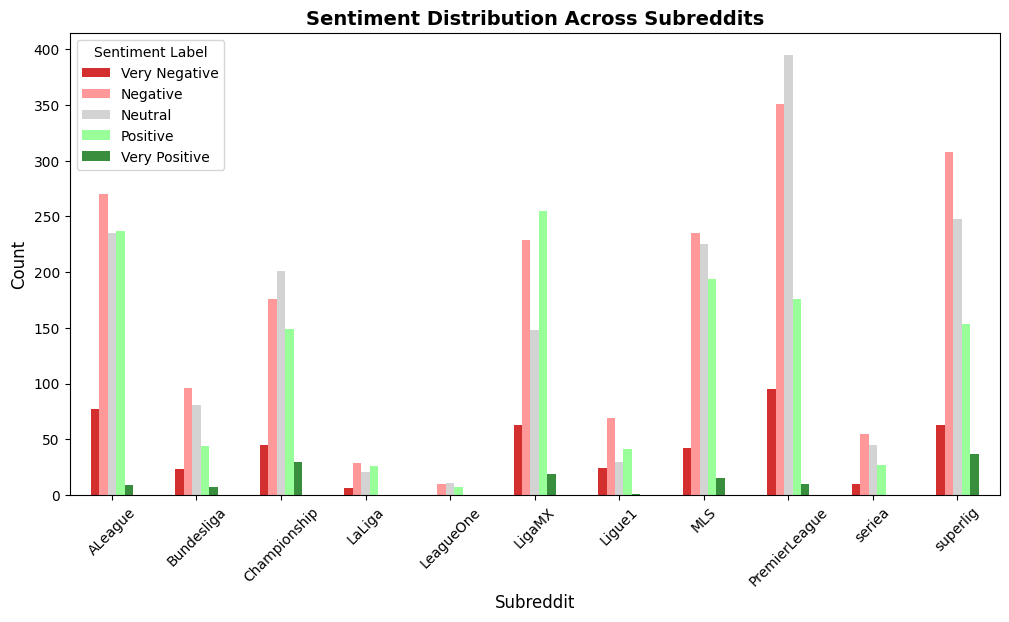

In [8]:
# Plot stacked bar chart
fig = plt.figure(figsize=(12, 6))
ax1 = fig.subplots()
subr_value_counts.plot(kind="bar", stacked=False, color=[sentiment_colors[sent] for sent in subr_value_counts.columns], ax=ax1)

# Formatting
ax1.set_title("Sentiment Distribution Across Subreddits", fontsize=14, fontweight="bold")
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xlabel("Subreddit", fontsize=12)
ax1.legend(title="Sentiment Label")
ax1.tick_params(axis="x", rotation=45)

plt.show()

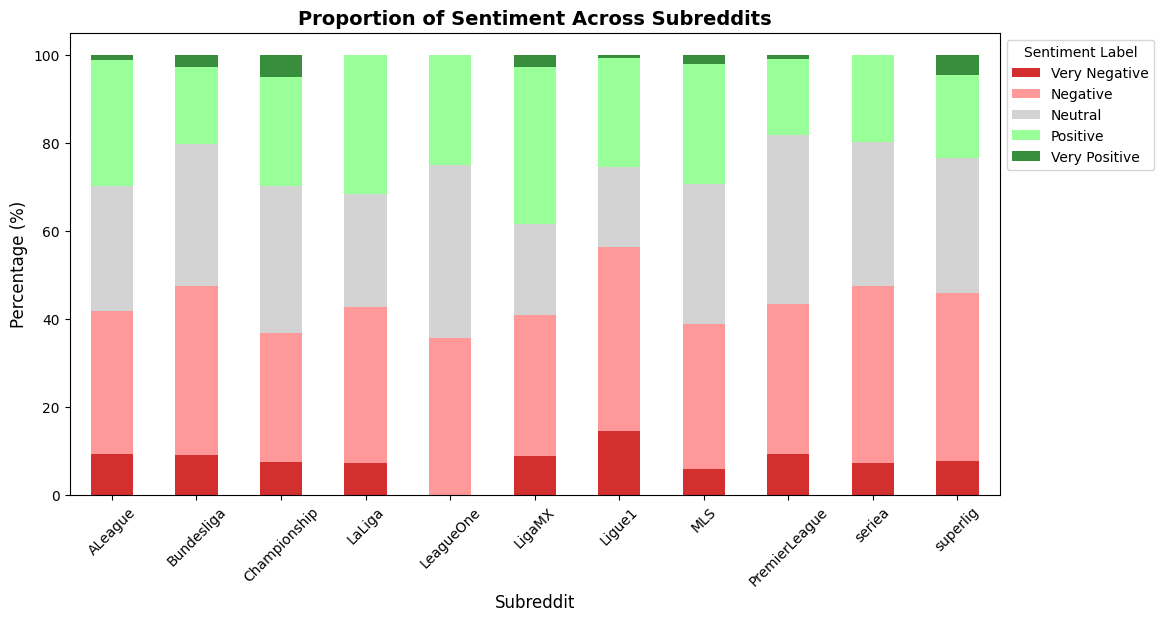

In [9]:
# Get % makeup of each sentiment per subr
sentiment_percentages = subr_value_counts.div(subr_value_counts.sum(axis=1), axis=0) * 100
sentiment_percentages = sentiment_percentages.reindex(columns=sentiment_order)

# plot stacked bar
fig = plt.figure(figsize=(12, 6))
ax1 = fig.subplots()
sentiment_percentages.plot(kind="bar", stacked=True, color=[sentiment_colors[sent] for sent in sentiment_percentages.columns], ax=ax1)

# format axis
ax1.set_title("Proportion of Sentiment Across Subreddits", fontsize=14, fontweight="bold")
ax1.set_ylabel("Percentage (%)", fontsize=12)
ax1.set_xlabel("Subreddit", fontsize=12)
ax1.legend(title="Sentiment Label").set_bbox_to_anchor((1, 1))
ax1.tick_params(axis="x", rotation=45)

plt.show()


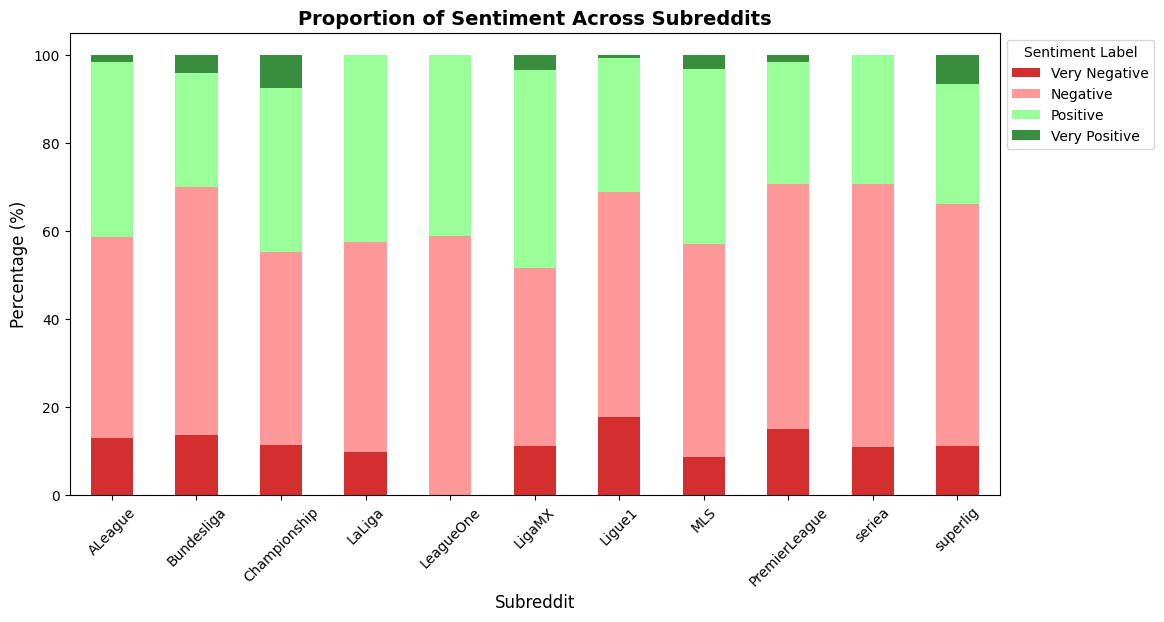

In [10]:
# Get % makeup of each sentiment per subr
non_neutral = subr_value_counts.drop("Neutral", axis=1)
sentiment_percentages = non_neutral.div(non_neutral.sum(axis=1), axis=0) * 100
sentiment_percentages = sentiment_percentages.reindex(columns=sentiment_order.remove("Neutral"))

# plot stacked bar
fig = plt.figure(figsize=(12, 6))
ax1 = fig.subplots()
sentiment_percentages.plot(kind="bar", stacked=True, color=[sentiment_colors[sent] for sent in sentiment_percentages.columns], ax=ax1)

# format axis
ax1.set_title("Proportion of Sentiment Across Subreddits", fontsize=14, fontweight="bold")
ax1.set_ylabel("Percentage (%)", fontsize=12)
ax1.set_xlabel("Subreddit", fontsize=12)
ax1.legend(title="Sentiment Label").set_bbox_to_anchor((1, 1))
ax1.tick_params(axis="x", rotation=45)

plt.show()

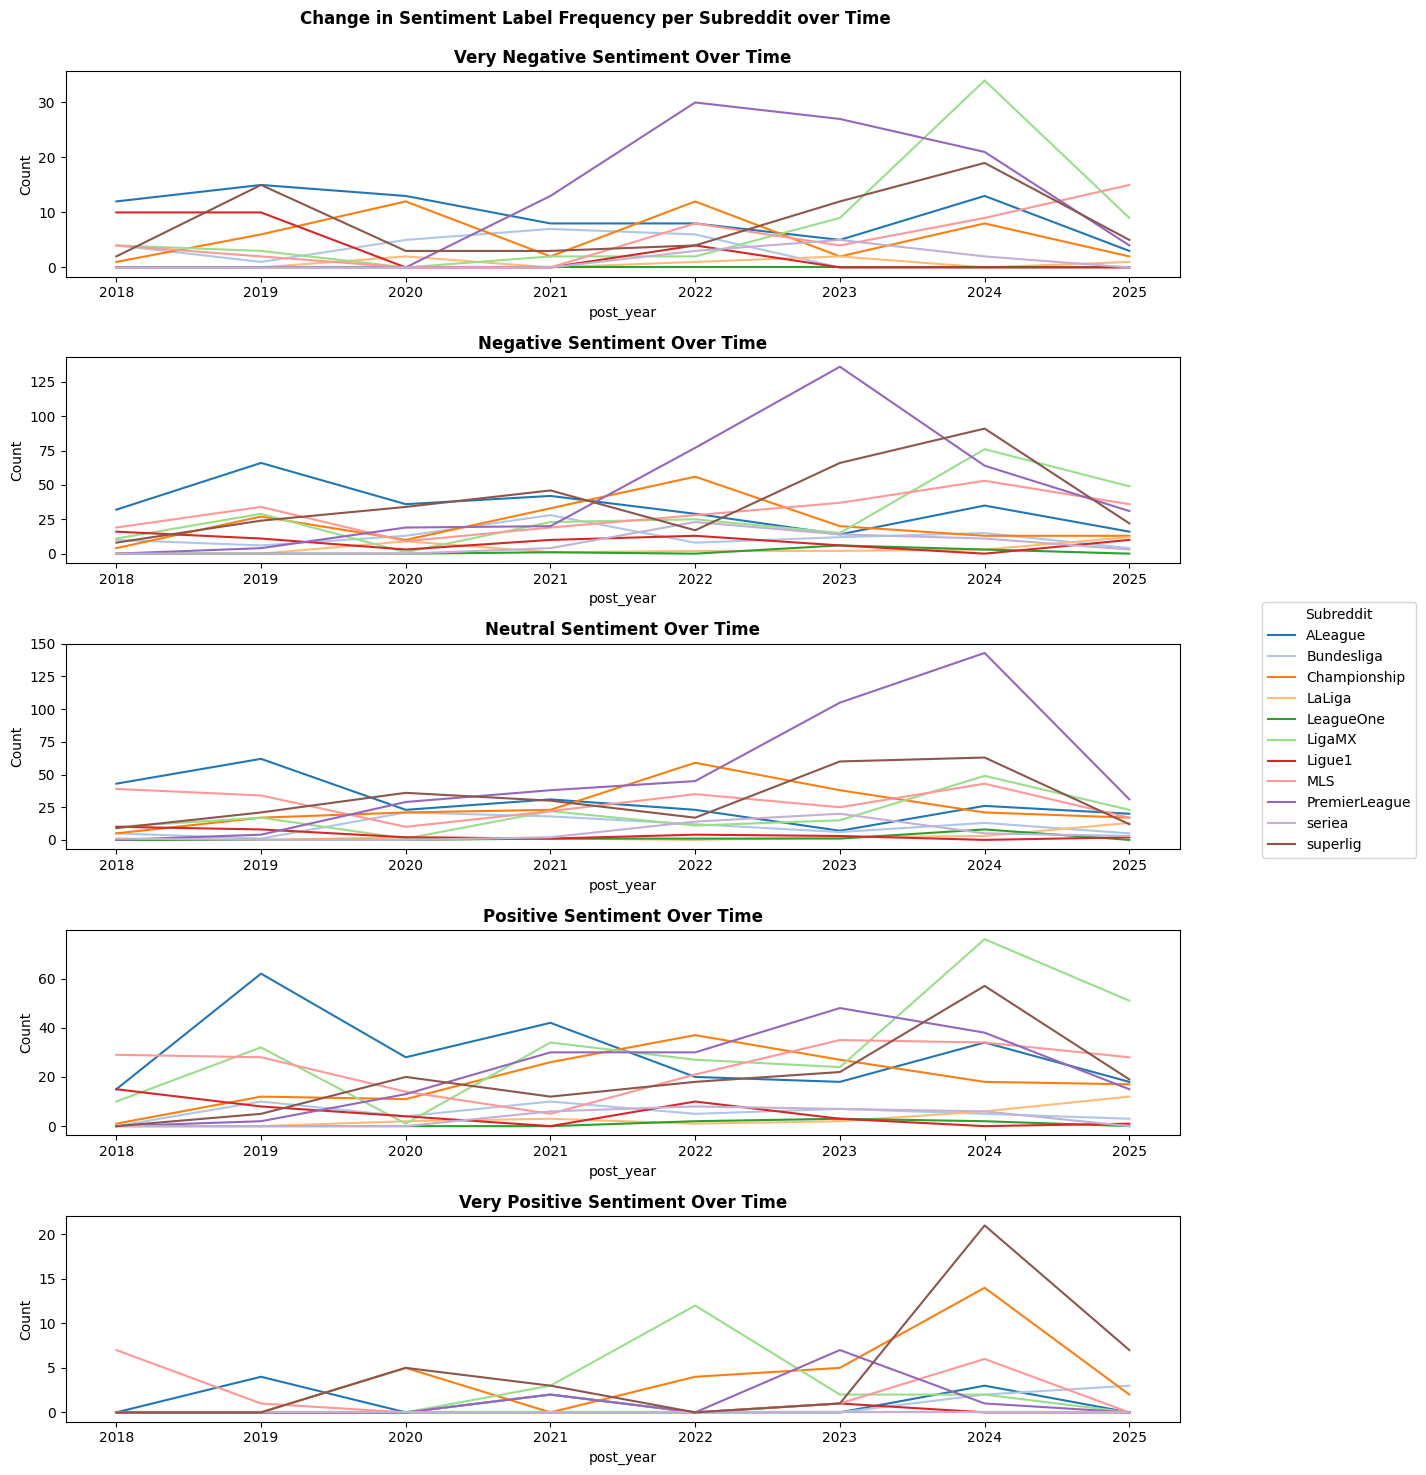

In [11]:
sentiment_order = ["Very Negative", "Negative", "Neutral", "Positive", "Very Positive"]

def plot_sentiment_timeseries(df, sent, axis):
    sns.lineplot(df, x="post_year", y=sent, hue="subreddit", ax=axis, palette="tab20")

fig = plt.figure(figsize=(12, 15))
axis = fig.subplots(nrows=5)
for i, sent in enumerate(sentiment_order):
    plot_sentiment_timeseries(sentiment_counts, sent, axis[i])
    axis[i].set_title(f"{sent} Sentiment Over Time", fontsize=12, fontweight="bold")
    axis[i].set_ylabel("Count")
    h, l = axis[i].get_legend_handles_labels()
    handles, labels = h, l

for ax in axis:
    ax.get_legend().remove()

fig.legend(handles, labels, title="Subreddit", bbox_to_anchor=(1.05, 0.5), loc="center left")
fig.suptitle("Change in Sentiment Label Frequency per Subreddit over Time\n", fontweight="bold")
fig.tight_layout()

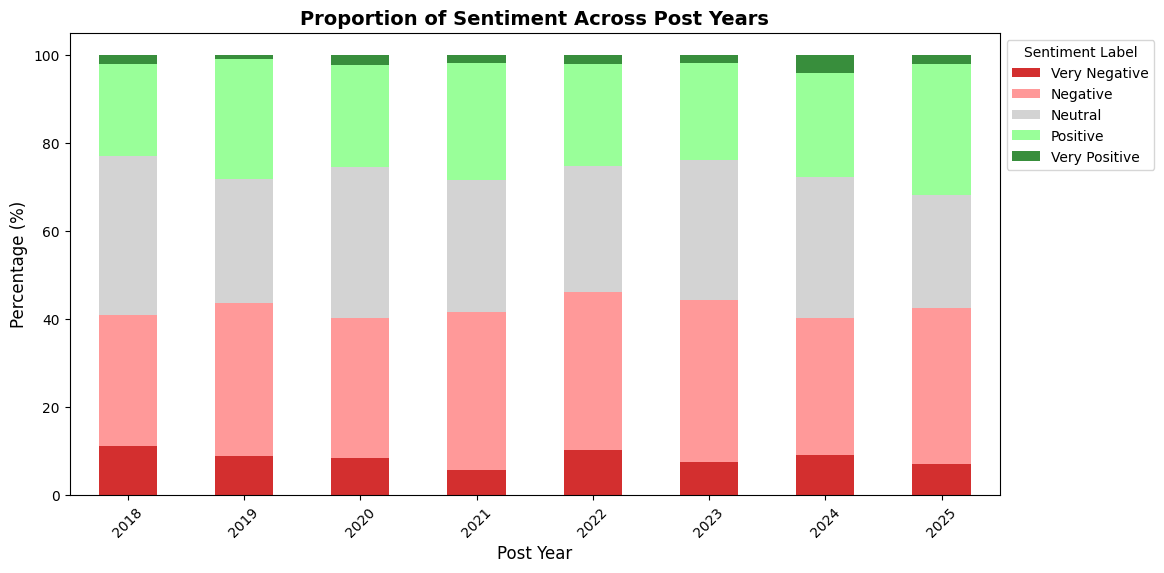

In [12]:
# Get % makeup of each sentiment per year
sentiment_percentages = year_value_counts.div(year_value_counts.sum(axis=1), axis=0) * 100
sentiment_percentages = sentiment_percentages.reindex(columns=sentiment_order)

# plot stacked bar
fig = plt.figure(figsize=(12, 6))
ax1 = fig.subplots()
sentiment_percentages.plot(kind="bar", stacked=True, color=[sentiment_colors[sent] for sent in sentiment_percentages.columns], ax=ax1)

# format axis
ax1.set_title("Proportion of Sentiment Across Post Years", fontsize=14, fontweight="bold")
ax1.set_ylabel("Percentage (%)", fontsize=12)
ax1.set_xlabel("Post Year", fontsize=12)
ax1.legend(title="Sentiment Label").set_bbox_to_anchor((1, 1))
ax1.tick_params(axis="x", rotation=45)

plt.show()


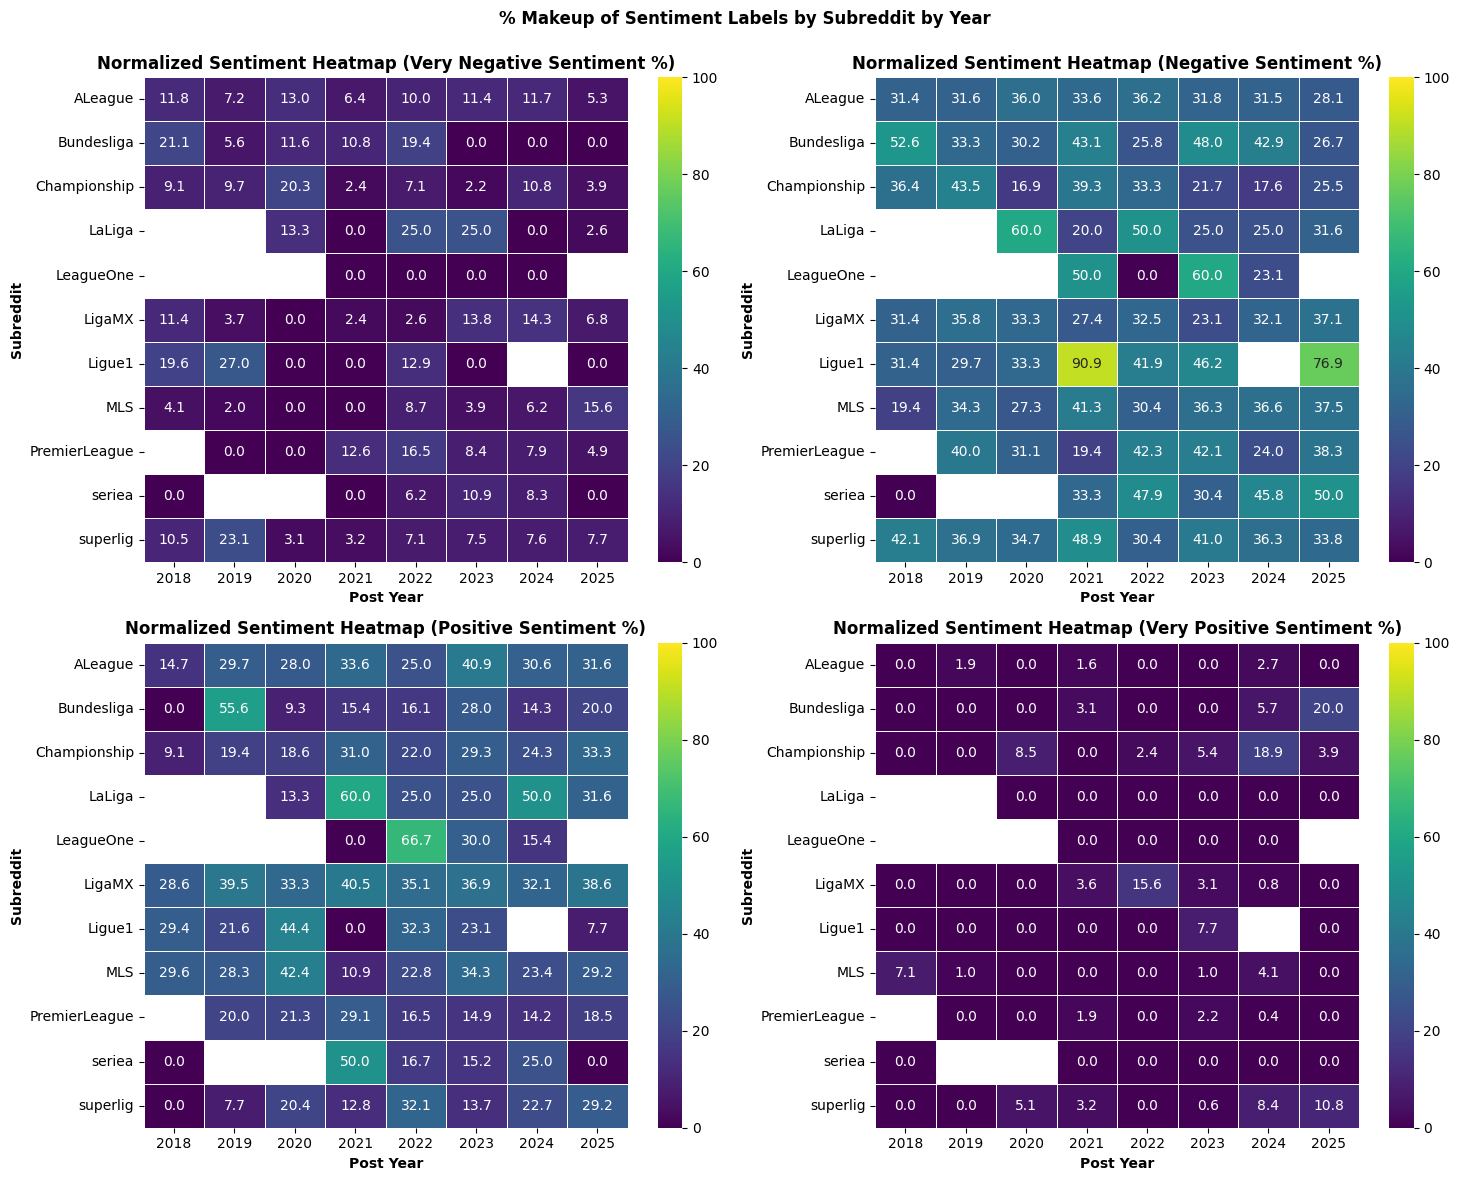

In [13]:
import matplotlib.gridspec as gridspec

sentiment_counts[sentiment_order] = sentiment_counts[sentiment_order].div(sentiment_counts[sentiment_order].sum(axis=1), axis=0) * 100  # Convert to percentages

def plot_sentiment_heatmap(sentiment, axis):
    """Plot a heatmap of the % makeup of a chosen sentiment."""
    # adjust dataframe for chosen sentiment
    heatmap_data = sentiment_counts.pivot(index="subreddit", columns="post_year", values=sentiment)

    # Create heatmap
    sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".1f", linewidths=0.5, ax=axis, vmin=0, vmax=100)

    # plot formatting
    axis.set_xlabel("Post Year", fontweight="bold")
    axis.set_ylabel("Subreddit", fontweight="bold")
    axis.set_title(f"Normalized Sentiment Heatmap ({sentiment} Sentiment %)", fontweight="bold")


fig = plt.figure(figsize=(15, 12))
ax_list = fig.subplots(nrows=2, ncols=2).flatten()
sentiments = ["Very Negative", "Negative", "Positive", "Very Positive"]

# Assign sentiment heatmaps
for ax, sentiment in zip(ax_list, sentiments):
    plot_sentiment_heatmap(sentiment, ax)

fig.suptitle("% Makeup of Sentiment Labels by Subreddit by Year\n", fontweight="bold")
fig.tight_layout()


In [17]:
year_value_counts

weighted_comment_sentiment,Very Negative,Negative,Neutral,Positive,Very Positive
post_year,,,,,
2018,37,100,122,70,7
2019,52,201,164,159,5
2020,35,134,145,97,10
2021,35,227,189,168,12
2022,78,278,221,179,16
2023,66,328,282,196,17
2024,106,364,374,276,49
2025,39,196,143,164,12
